In [7]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
#Load the dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame = True)

In [3]:
# Use only the BMI feature
diabetes_X = diabetes_X.loc[:,['bmi']]

In [4]:
#The BMI is zero-centered and normalized, I recenter it for ease of presentation
diabetes_X = diabetes_X * 30 + 25 

In [5]:
#Collect 20 data points
diabetes_X_train = diabetes_X.iloc[-20:]
diabetes_y_train = diabetes_y.iloc[-20:]

In [6]:
#display some of the data points 
pd.concat([diabetes_X_train, diabetes_y_train], axis = 1).head()

,bmi,target
422,27.335902,233.0
423,23.811456,91.0
424,25.331171,111.0
425,23.779122,152.0
426,23.973128,120.0


Text(0, 0.5, 'Diabetes Risk')

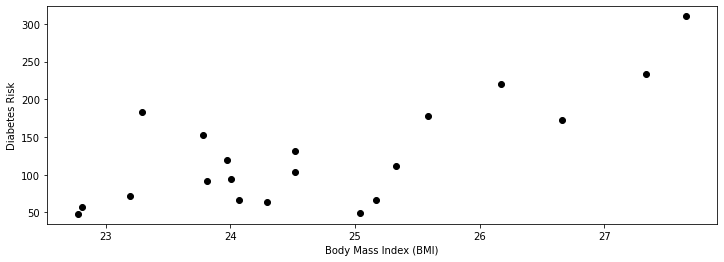

In [8]:
plt.rcParams['figure.figsize'] = [12,4]

plt.scatter(diabetes_X_train, diabetes_y_train, color = 'black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

###### We can assume that risk is a linear function of BMI where X is BMI and y is the diabetes risk score 

In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [10]:
#Create linear regression object
regr = linear_model.LinearRegression()

In [11]:
regr.fit(diabetes_X_train, diabetes_y_train.values)

LinearRegression()

In [12]:
diabetes_y_train_pred = regr.predict(diabetes_X_train)

#the coefficients
print('Slope: \t', regr.coef_[0])
print('Intercept \t', regr.intercept_)

Slope: 	 37.37884216052121
Intercept 	 -797.0817390343262


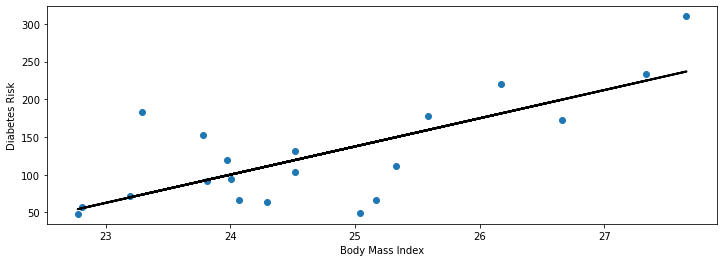

In [13]:
plt.xlabel('Body Mass Index')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.plot(diabetes_X_train, diabetes_y_train_pred, color='black', linewidth = 2)

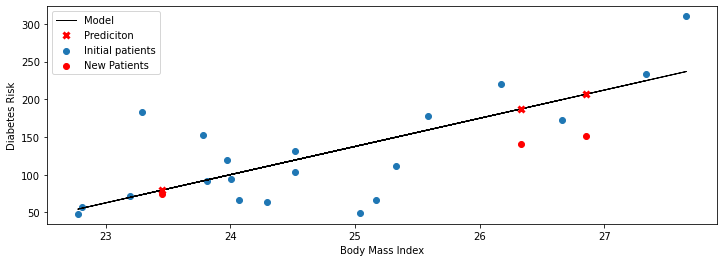

In [16]:
diabetes_X_test = diabetes_X.iloc[:3]
diabetes_y_test = diabetes_y.iloc[:3]

diabetes_y_test_pred = regr.predict(diabetes_X_test)

plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'red')
plt.xlabel('Body Mass Index')
plt.ylabel('Diabetes Risk')
plt.plot(diabetes_X_train, diabetes_y_train_pred, color='black', linewidth = 1)
plt.plot(diabetes_X_test, diabetes_y_test_pred, 'x', color='red',mew=3)
plt.legend(['Model','Prediciton', 'Initial patients','New Patients'])